# Decision Trees

In [9]:
# common imports
import numpy as np
import os

np.random.seed(42)

# To enhance graphing
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize= 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

# to save future files
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decisiontree"
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

Decision Trees are versatile Machine Learning algorithms that can preform both classification ad regression tasks, and even multioutput tasks. The are capable of fitting complex datasets.

## Training and Visualizing a Decison Tree

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X= iris["data"][:, 2:] # petal lenght and width
y = iris["target"]
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

To visualize the trained Decision Tree we will use export_graphviz

In [11]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


The code above allows you to covert this .dot file to a variety of formats such as PDF or PNG  using the dot comand-line tool form the graphviz package.

In [12]:
graph = Source(tree.export_graphviz(tree_clf, out_file = None,
                feature_names = iris.feature_names[2:], class_names = iris.target_names,
                filled = True))

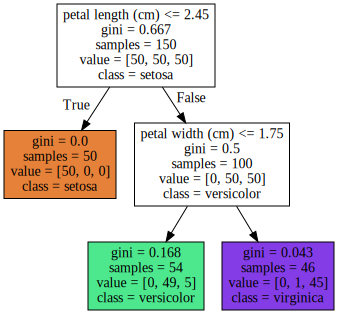

In [13]:
display(SVG(graph.pipe(format="svg")))

## Making Prediction

Starting at the root node a decision or division question is answer for the group. True goes left false goes right. The decision or division questions are answered to reach the level of max_depth declared(unless classification has already occured). The color nodes are called the leaf nodes. These nodes are ending points(nodes with no children) and give a prediction. If max depth has not been reached then a new division statement is giving to seperate the child node.

 Each node displays 4 attributes
    1. gini -measures its impurity : a node is "pure"(gini = 0) if all training instances it applies to belong to the same class
    2. samples - counts how many training instances it applies to
    3. value - tells you how many training instances of each class this node applies to
    4. class - states the predicted class

Gini impurity

$G_{i}$ = 1 = $\sum_{k=1}^{n} p_{i,k}^2$

$p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node

For the example above the gini score for the virginica leaf node is 1-$\frac{1}{46}^{2}$-$\frac{45}{46}^{2}$

One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don't require feature scaling or centering at all.

Scikit Learn only uses the CART algorithm  which produces only binary trees. However other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children

### Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class. The example below inputs a flower whose petals are 5cm long and 1.5 cm wide. It returns an array with the probabilites of all the possible class. The predict method just returns the class it is predicted to to be in. 

In [14]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

In [16]:
tree_clf.predict([[7, 1.5]])

array([1])

The above example shows the need for more depth. The flower with the petal length of 7 is most likely to be a Virginica but since the depth one node is about petal width it gets labeled a versicolor. 

#### More depth 

In [17]:
tree_clf1 = DecisionTreeClassifier(max_depth=3)
tree_clf1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
graph = Source(tree.export_graphviz(tree_clf1, out_file = None,
                feature_names = iris.feature_names[2:], class_names = iris.target_names,
                filled = True))

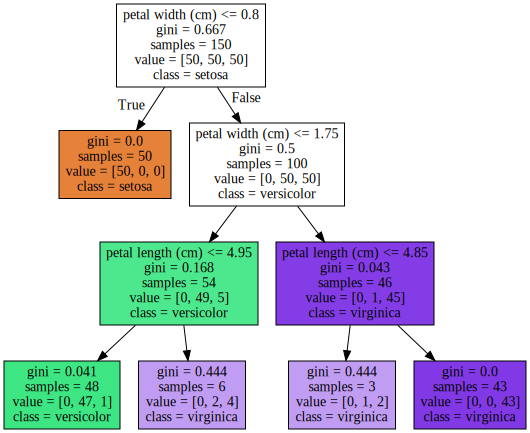

In [19]:
display(SVG(graph.pipe(format="svg")))

In [20]:
tree_clf1.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [21]:
tree_clf1.predict([[5, 1.5]])

array([2])

In [22]:
tree_clf2 = DecisionTreeClassifier()
tree_clf2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
tree_clf2.predict_proba([[5, 1.5]])

array([[0., 0., 1.]])

In [24]:
graph = Source(tree.export_graphviz(tree_clf2, out_file = None,
                feature_names = iris.feature_names[2:], class_names = iris.target_names,
                filled = True))

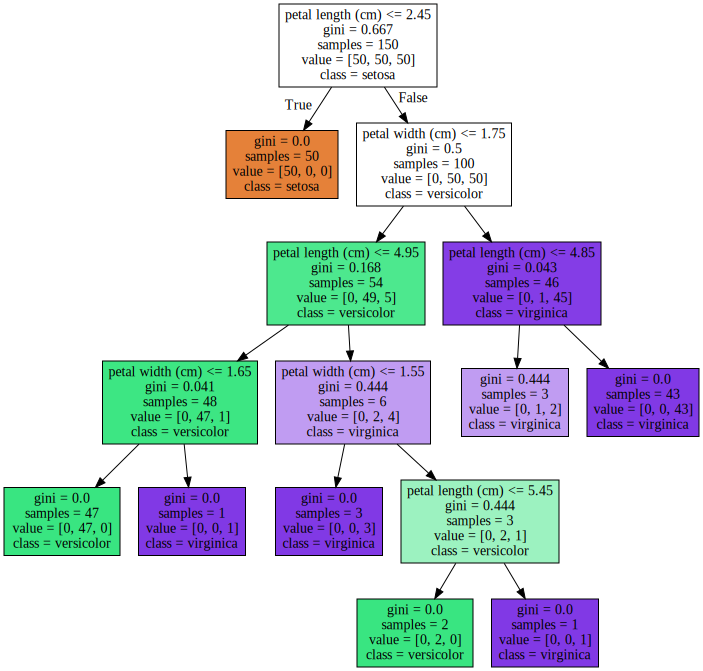

In [25]:
display(SVG(graph.pipe(format="svg")))

## The CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree(CART) algorithm to train Decision Trees. This algorithm  splits each node into pairs the produces the purest subsets(weighted by there size). The cost function that the algorithm tries to minimize is given below.

$J(k,t_{k})$ = $\frac{m_{left}}{m}G_{left}$ + $\frac{m_{right}}{m}G_{right}$

Where $G_{left/right}$ measures the impurity of the left/right subset, $m_{left/right}$ is the number of instances in the left/right subset 

It continues to split nodes intill it reach it max_depth or if it cannot find a split that will reduce impurity.
there are a few other hyperparameters that will control the stopping condition (min_samples_split, min_samples_leaf, min_weight_faction_leaf, and max_leaf_nodes)

##### Greedy algorithm

A greedy algorithm often produces a resonably good solution, but it is not guarenteed to be the optimal solution. The CART is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process a each level. It does not check whether or not the split will led to the lowest possible impurity several levels down.

### Computational Complexity

Making prediction requires traversing the Decision Tree from the root to a leaf. Since Decision Trees are generally balanced, traversing the tree requires going through roughly $O(log_{2}(m)$) nodes. However, the training algorithm compares all features(or less if max_features is set) on all samples at each node. This results in a training complexity of $O(n \times m log_{2}(m))$.  For small training sets(less than a few thousand instances), Scikit-Learn cna speed up the training by presorting the data(set presort= True)

### Gini Impurity or Entropy?

By default, the Gini impurity measure is used but you can select entropy impurity by setting the criterion hyperparameter to "entropy".  

$H_{i}$ = - $\sum_{k=1}^{n} p_{i,k}log(p_{i,k})$

To compare this value to gini here is the results for the gini example above -$\frac{49}{54}log(\frac{49}{54}) - \frac{5}{54}log(\frac{5}{54})$ = .31
                                                                                                                                

So which should you use. Gini impurity is slightly faster to compute but when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

### Regularization Hyperparameters

Decision Trees make very few assumptions about the training data. If left unconstrained the tree structure will adapt itself to the training data fitting it very closely, and most likely overfitting. To avoid overfitting the training data, you need to restrict the Decision Tree's freedom during trianing.  

One way is to reduce the depth, by setting the max_depth. Other parameters that restrict the shape are min_samples_split(the minimum number of samples a node must have before it can be split), min_sample_leaf(the minimum number of samples of leaf node must have), min_weight_fraction_leaf(same as min_sample_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (maximum number of leaf nodes), and max_features(maximum number of features that are evaluated for spliting at each node). Increasing min_* hyperaparameters or reducing max_* hyperparameters will regularize the model.

## Regression

Decision Trees are also capable of performing regression task. Below is an example trained on a noisy quadratic dataset

In [29]:
from sklearn.tree import DecisionTreeRegressor
X = np.linspace(-3,3, 100)
y = X**2 + 3* X + 4*(np.random.rand())
tree_clf4 = DecisionTreeRegressor(max_depth = 2)
tree_clf4.fit(X.reshape(-1,1),y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

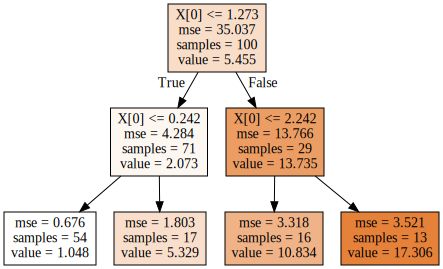

In [30]:
graph = Source(tree.export_graphviz(tree_clf4, out_file = None,
                
                filled = True))
display(SVG(graph.pipe(format="svg")))

In [35]:

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

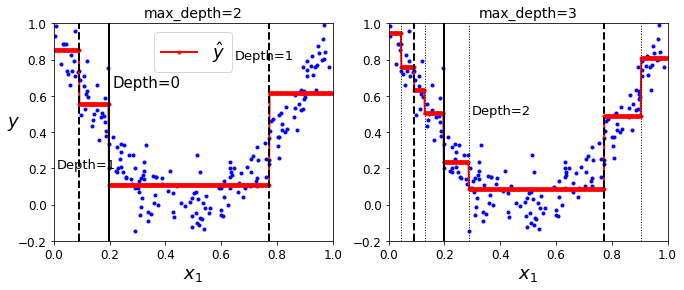

In [37]:
# got straight out of books website

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

These predicted values are the red lines. Notice that the predicted value for each region is always the average target value of the instances in that region. An unrestricted tree will overfit but changing the min_samples_leaf= 10 will make a more resonable representation. 

In [38]:
tree_reg3 = DecisionTreeRegressor()
tree_reg4 = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg3.fit(X,y)
tree_reg4.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

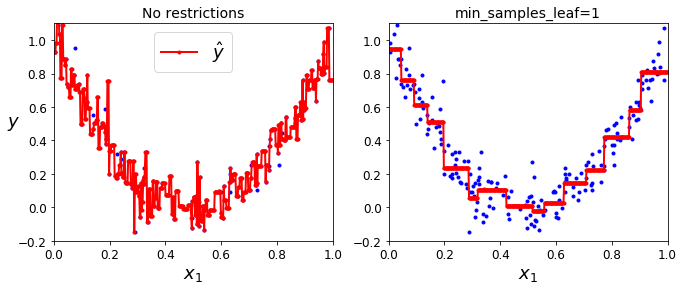

In [40]:
# straight out of websites 
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg3.predict(x1)
y_pred2 = tree_reg4.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### Instability